In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
df0 = df[df.target == 0]  # Setosa
df1 = df[df.target == 1]  # Versicolor
df2 = df[df.target == 2]  # Virginica

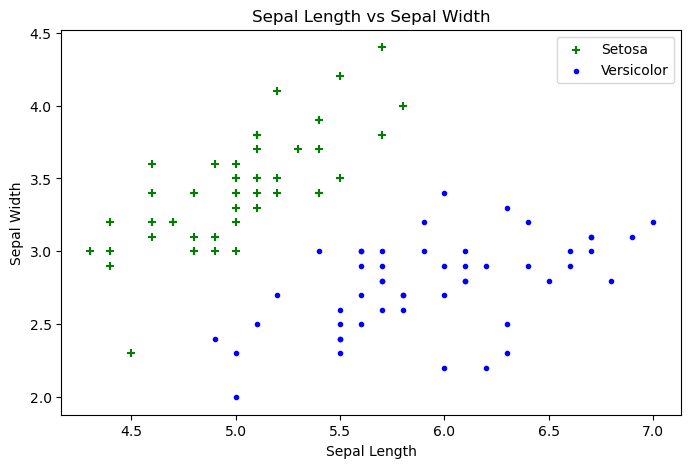

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

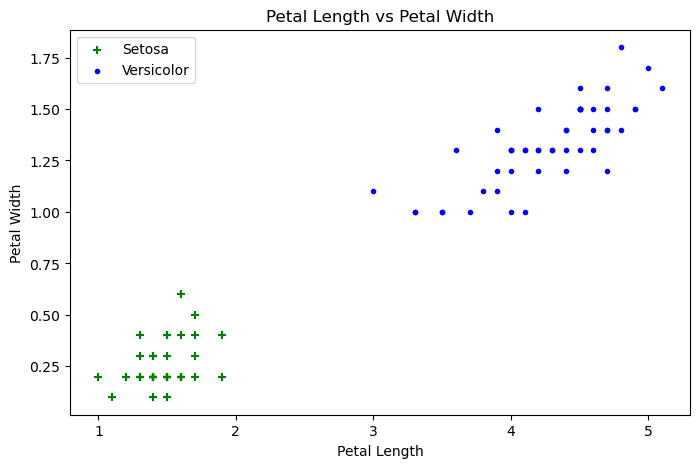

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+', label="Setosa")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.', label="Versicolor")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

In [6]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))

Train set size: 120
Test set size: 30


In [7]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
sample_prediction = knn.predict([[4.8, 3.0, 1.5, 0.3]])
print("Prediction for [4.8, 3.0, 1.5, 0.3]:", iris.target_names[sample_prediction][0])

Prediction for [4.8, 3.0, 1.5, 0.3]: setosa


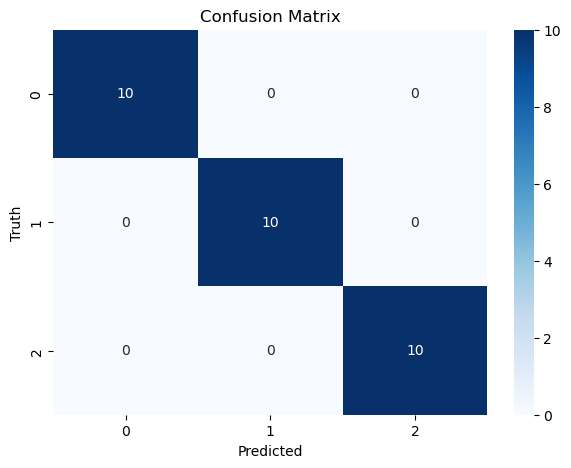

In [8]:
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [9]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

